In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler 

In [24]:
df = pd.read_csv("C:/Users/ASUS/Downloads/agricultural_yield.csv")
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [25]:
X = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']]
y = df[['Yield_kg_per_hectare']]

In [26]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.7,random_state=42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])  # Use metrics suitable for regression

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 541494.6250 - mean_absolute_error: 709.2607 - val_loss: 471518.4688 - val_mean_absolute_error: 657.2618
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 374763.9688 - mean_absolute_error: 577.5850 - val_loss: 35145.4336 - val_mean_absolute_error: 161.0654
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19931.1504 - mean_absolute_error: 111.9672 - val_loss: 11937.2451 - val_mean_absolute_error: 87.4541
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11796.9502 - mean_absolute_error: 86.2954 - val_loss: 9917.7793 - val_mean_absolute_error: 79.6942
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10217.1709 - mean_absolute_error: 81.3825 - val_loss: 8652.7021 - val_mean_absolute_error: 74.6408
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9099.8242 - mean_absolute_error: 75.5583 - val_loss: 7504.3276 - val_mean_absolute_error: 69.4874
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [32]:
test_loss, test_mae = model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2692.0732 - mean_absolute_error: 42.1828
Test Mean Absolute Error: 42.74


In [33]:
y_pred = model.predict(X_test)
y_pred

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[577.5953 ],
       [541.69836],
       [304.6655 ],
       ...,
       [605.5026 ],
       [737.11066],
       [589.3008 ]], dtype=float32)

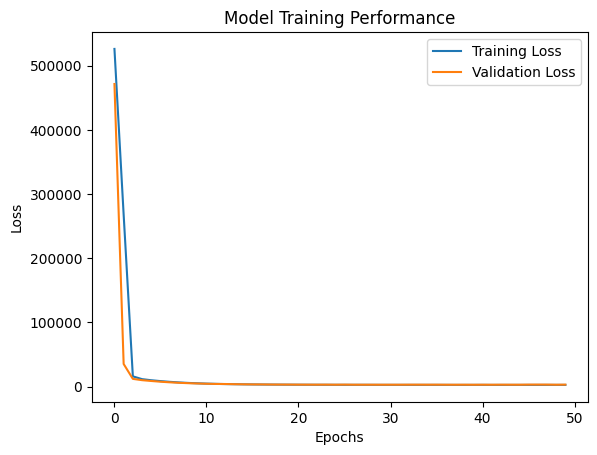

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14904\752915531.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14904\752915531.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


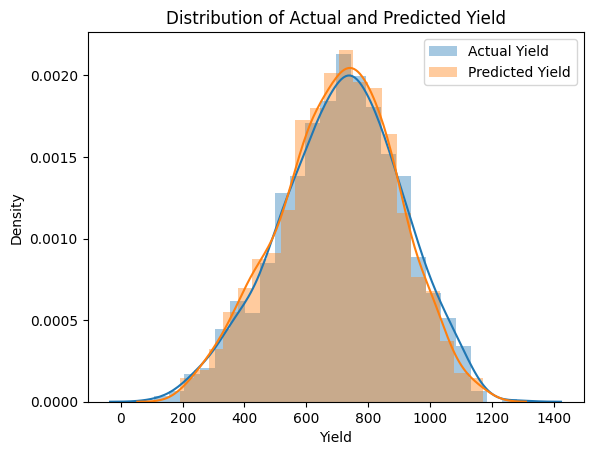

In [35]:
import seaborn as sns
# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

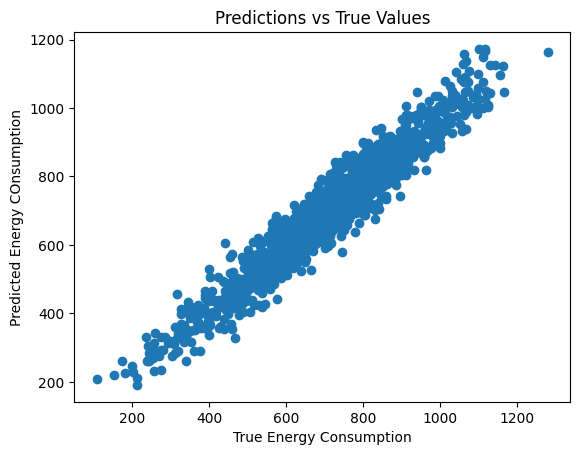

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Energy Consumption")
plt.ylabel('Predicted Energy COnsumption')
plt.title("Predictions vs True Values")
plt.show()